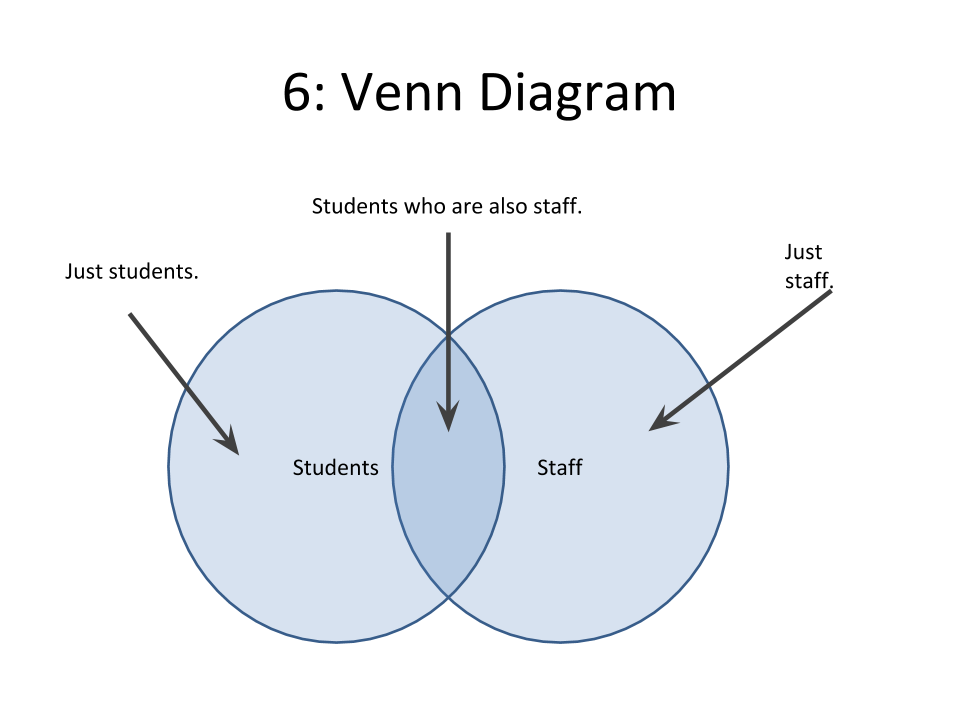

In [18]:
from PIL import Image
from IPython.display import display

merging1=Image.open('merging1.png')
display (merging1)

In [19]:
import pandas as pd

staff_df = pd.DataFrame([{'Name':'Kelly','Role':'Director of HR'},
                        {'Name':'Sally','Role':'Course liasion'},
                        {'Name':'James','Role':'Grader'}])

staff_df = staff_df.set_index('Name')

student_df = pd.DataFrame([{'Name':'James','School':'Business'},
                              {'Name':'Mike','School':'Law'},
                              {'Name':'Sally','School':'Engineering'}])
Student_df = student_df.set_index('Name')

print(staff_df.head())
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader
    Name       School
0  James     Business
1   Mike          Law
2  Sally  Engineering


In [20]:
pd.merge(staff_df,student_df,how='outer',left_index=True, right_index=True)

,Role,Name,School
0,NaN,James,Business
1,NaN,Mike,Law
2,NaN,Sally,Engineering
James,Grader,NaN,NaN
Kelly,Director of HR,NaN,NaN
Sally,Course liasion,NaN,NaN


In [21]:
#Group by

import pandas as pd
import numpy as np

df=pd.read_csv('census.csv')
df=df[df['SUMLEV']==50]
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [22]:
%%timeit -n 3
for state in df['STNAME'].unique():
    avg=np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in state'+state+'have an average population of '+str(avg))

Counties in stateAlabamahave an average population of 71339.34328358209
Counties in stateAlaskahave an average population of 24490.724137931036
Counties in stateArizonahave an average population of 426134.4666666667
Counties in stateArkansashave an average population of 38878.90666666667
Counties in stateCaliforniahave an average population of 642309.5862068966
Counties in stateColoradohave an average population of 78581.1875
Counties in stateConnecticuthave an average population of 446762.125
Counties in stateDelawarehave an average population of 299311.3333333333
Counties in stateDistrict of Columbiahave an average population of 601723.0
Counties in stateFloridahave an average population of 280616.5671641791
Counties in stateGeorgiahave an average population of 60928.63522012578
Counties in stateHawaiihave an average population of 272060.2
Counties in stateIdahohave an average population of 35626.86363636364
Counties in stateIllinoishave an average population of 125790.50980392157
Co

In [23]:
%%timeit -n 3

for group, frame in df.groupby('STNAME'):
    avg=np.average(frame['CENSUS2010POP'])
    print('Countries in state'+group+'have an average population of '+str(avg))

Countries in stateAlabamahave an average population of 71339.34328358209
Countries in stateAlaskahave an average population of 24490.724137931036
Countries in stateArizonahave an average population of 426134.4666666667
Countries in stateArkansashave an average population of 38878.90666666667
Countries in stateCaliforniahave an average population of 642309.5862068966
Countries in stateColoradohave an average population of 78581.1875
Countries in stateConnecticuthave an average population of 446762.125
Countries in stateDelawarehave an average population of 299311.3333333333
Countries in stateDistrict of Columbiahave an average population of 601723.0
Countries in stateFloridahave an average population of 280616.5671641791
Countries in stateGeorgiahave an average population of 60928.63522012578
Countries in stateHawaiihave an average population of 272060.2
Countries in stateIdahohave an average population of 35626.86363636364
Countries in stateIllinoishave an average population of 125790.

In [24]:
df=df.set_index('STNAME')

def set_batch_number(item):
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

for group, frame in df.groupby(set_batch_number):
    print('There are'+str(len(frame))+'records in group'+str(group)+'for processing.')

There are1177records in group0for processing.
There are1134records in group1for processing.
There are831records in group2for processing.


In [26]:
df=pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [27]:
df=df.set_index(['cancellation_policy','review_scores_value'])

for group, frame in df.groupby(level=(0,1)):
    print(group)

('flexible', 2.0)
('flexible', 4.0)
('flexible', 5.0)
('flexible', 6.0)
('flexible', 7.0)
('flexible', 8.0)
('flexible', 9.0)
('flexible', 10.0)
('moderate', 2.0)
('moderate', 4.0)
('moderate', 6.0)
('moderate', 7.0)
('moderate', 8.0)
('moderate', 9.0)
('moderate', 10.0)
('strict', 2.0)
('strict', 3.0)
('strict', 4.0)
('strict', 5.0)
('strict', 6.0)
('strict', 7.0)
('strict', 8.0)
('strict', 9.0)
('strict', 10.0)
('super_strict_30', 6.0)
('super_strict_30', 7.0)
('super_strict_30', 8.0)
('super_strict_30', 9.0)
('super_strict_30', 10.0)


In [28]:
def grouping_fun(item):
    if item[1]==10.0:
        return(item[0],'10.0')
    else:
        return(item[0],'not 10.0')

for group, frame in df.groupby(by=grouping_fun):
    print(group)

('flexible', '10.0')
('flexible', 'not 10.0')
('moderate', '10.0')
('moderate', 'not 10.0')
('strict', '10.0')
('strict', 'not 10.0')
('super_strict_30', '10.0')
('super_strict_30', 'not 10.0')


In [29]:
df=df.reset_index()

df.groupby('cancellation_policy').agg({'review_scores_value':np.average})

,review_scores_value
cancellation_policy,
flexible,NaN
moderate,NaN
strict,NaN
super_strict_30,NaN


In [30]:
df.groupby('cancellation_policy').agg({'review_scores_value':np.nanmean})

C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\2733235120.py:1: FutureWarning: The provided callable <function nanmean at 0x000001D47E6BFB00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('cancellation_policy').agg({'review_scores_value':np.nanmean})


,review_scores_value
cancellation_policy,
flexible,9.237421
moderate,9.307398
strict,9.081441
super_strict_30,8.537313


In [31]:
df.groupby('cancellation_policy').agg({'review_scores_value':(np.nanmean,np.nanstd),
                                       'reviews_per_month':np.nanmean})

C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\280692328.py:1: FutureWarning: The provided callable <function nanmean at 0x000001D47E6BFB00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('cancellation_policy').agg({'review_scores_value':(np.nanmean,np.nanstd),
C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\280692328.py:1: FutureWarning: The provided callable <function nanstd at 0x000001D47E6C8540> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby('cancellation_policy').agg({'review_scores_value':(np.nanmean,np.nanstd),
C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\280692328.py:1: FutureWarning: The provided callable <function nanmean at 0x000001D47E6BFB00> is currently using SeriesGroupBy.mean. In a future ve

review_scores_value           reviews_per_month
                                nanmean    nanstd           nanmean
cancellation_policy                                                
flexible                       9.237421  1.096271          1.829210
moderate                       9.307398  0.859859          2.391922
strict                         9.081441  1.040531          1.873467
super_strict_30                8.537313  0.840785          0.340143

In [32]:
#Transformation

cols=['cancellation_policy','review_scores_value']
transform_df=df[cols].groupby('cancellation_policy').transform(np.nanmean)
transform_df.head()

C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\1640920127.py:4: FutureWarning: The provided callable <function nanmean at 0x000001D47E6BFB00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  transform_df=df[cols].groupby('cancellation_policy').transform(np.nanmean)


,review_scores_value
0,9.307398
1,9.307398
2,9.307398
3,9.307398
4,9.237421


In [33]:
transform_df.rename({'review_scores_value':'mean_review_scores'}, axis='columns',inplace=True)
df=df.merge(transform_df, left_index=True,right_index=True)
df.head()

,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,review_scores_location,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores
0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",...,NaN,f,NaN,NaN,f,f,f,1,NaN,9.307398
1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,...,9.0,f,NaN,NaN,t,f,f,1,1.30,9.307398
2,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,9.0,f,NaN,NaN,f,t,f,1,0.47,9.307398
3,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,...,10.0,f,NaN,NaN,f,f,f,1,1.00,9.307398
4,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",...,9.0,f,NaN,NaN,f,f,f,1,2.25,9.237421


In [34]:
df['mean_diff']=np.absolute(df['review_scores_value']-df['mean_review_scores'])
df['mean_diff'].head()

0         NaN
1    0.307398
2    0.692602
3    0.692602
4    0.762579
Name: mean_diff, dtype: float64

In [35]:
#Filtering

df.groupby('cancellation_policy').filter(lambda x: np.nanmean(x['review_scores_value'])>9.2)

,cancellation_policy,review_scores_value,id,listing_url,scrape_id,last_scraped,name,summary,space,description,...,requires_license,license,jurisdiction_names,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores,mean_diff
0,moderate,NaN,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",...,f,NaN,NaN,f,f,f,1,NaN,9.307398,NaN
1,moderate,9.0,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,...,f,NaN,NaN,t,f,f,1,1.30,9.307398,0.307398
2,moderate,10.0,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",...,f,NaN,NaN,f,t,f,1,0.47,9.307398,0.692602
3,moderate,10.0,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,...,f,NaN,NaN,f,f,f,1,1.00,9.307398,0.692602
4,flexible,10.0,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",...,f,NaN,NaN,f,f,f,1,2.25,9.237421,0.762579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,flexible,NaN,14689681,https://www.airbnb.com/rooms/14689681,20160906204935,2016-09-07,Beautiful loft style bedroom with large bathroom,You'd be living on the top floor of a four sto...,NaN,You'd be living on the top floor of a four sto...,...,f,NaN,NaN,f,f,f,1,NaN,9.237421,NaN
3577,flexible,NaN,13750763,https://www.airbnb.com/rooms/13750763,20160906204935,2016-09-07,Comfortable Space in the Heart of Brookline,"Our place is close to Coolidge Corner, Allston...",This space consists of 2 Rooms and a private b...,"Our place is close to Coolidge Corner, Allston...",...,f,NaN,NaN,f,f,f,1,NaN,9.237421,NaN
3579,flexible,NaN,14852179,https://www.airbnb.com/rooms/14852179,20160906204935,2016-09-07,Spacious Queen Bed Room Close to Boston Univer...,- Grocery: A full-size Star market is 2 minute...,NaN,- Grocery: A full-size Star market is 2 minute...,...,f,NaN,NaN,f,f,f,1,NaN,9.237421,NaN
3582,flexible,NaN,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,...,f,NaN,NaN,f,f,f,1,NaN,9.237421,NaN


In [40]:
#Applying

df=pd.read_csv('listings.csv')
df=df[['cancellation_policy','review_scores_value']]
df.head()

,cancellation_policy,review_scores_value
0,moderate,NaN
1,moderate,9.0
2,moderate,10.0
3,moderate,10.0
4,flexible,10.0


In [42]:
def calc_mean_review_scores(group):
    # group is a dataframe just of whatever we have grouped by, e.g. cancellation policy, so we can treat
    # this as the complete dataframe
    avg=np.nanmean(group["review_scores_value"])
    # now broadcast our formula and create a new column
    group["review_scores_mean"]=np.abs(avg-group["review_scores_value"])
    return group

# Now just apply this to the groups
df.groupby('cancellation_policy').apply(calc_mean_review_scores).head()

cancellation_policy  review_scores_value  \
cancellation_policy                                               
flexible            4             flexible                 10.0   
                    5             flexible                 10.0   
                    10            flexible                 10.0   
                    11            flexible                  9.0   
                    12            flexible                 10.0   

                        review_scores_mean  
cancellation_policy                         
flexible            4             0.762579  
                    5             0.762579  
                    10            0.762579  
                    11            0.237421  
                    12            0.762579

In [44]:
#Pivot Table
import pandas as pd
import numpy as np

df=pd.read_csv('cwurData.csv')
df.head()


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [46]:
def create_category(ranking):
    if(ranking>=1)&(ranking<=100):
        return 'First Tier Top University'
    elif (ranking>=101)&(ranking<=200):
        return 'Second Tier Top University'
    elif (ranking>=201)&(ranking<=300):
        return 'Third Tier Top University'
    return 'Other Top University'

df['Rank_level']=df['world_rank'].apply(lambda x:create_category(x))
df.head()      


,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,Rank_level
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,First Tier Top University
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,First Tier Top University
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,First Tier Top University
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012,First Tier Top University
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012,First Tier Top University


In [48]:
df.pivot_table(values='score',index='country',columns='Rank_level',aggfunc=[np.mean]).head()

C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\2651069543.py:1: FutureWarning: The provided callable <function mean at 0x000001D47E577B00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values='score',index='country',columns='Rank_level',aggfunc=[np.mean]).head()


mean                       \
Rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN            44.672857   
Australia                    47.9425            44.645750   
Austria                          NaN            44.864286   
Belgium                      51.8750            45.081000   
Brazil                           NaN            44.499706   

                                                                 
Rank_level Second Tier Top University Third Tier Top University  
country                                                          
Argentina                         NaN                       NaN  
Australia                     49.2425                 47.285000  
Austria                           NaN                 47.066667  
Belgium                       49.0840                 46.746667  
Brazil                        49.5650                       NaN

In [49]:
df.pivot_table(values='score',index='country',columns='Rank_level',aggfunc=[np.mean, np.max]).head()

C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\1210588827.py:1: FutureWarning: The provided callable <function mean at 0x000001D47E577B00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values='score',index='country',columns='Rank_level',aggfunc=[np.mean, np.max]).head()
C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\1210588827.py:1: FutureWarning: The provided callable <function max at 0x000001D47E577100> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.pivot_table(values='score',index='country',columns='Rank_level',aggfunc=[np.mean, np.max]).head()


mean                       \
Rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN            44.672857   
Australia                    47.9425            44.645750   
Austria                          NaN            44.864286   
Belgium                      51.8750            45.081000   
Brazil                           NaN            44.499706   

                                                                 \
Rank_level Second Tier Top University Third Tier Top University   
country                                                           
Argentina                         NaN                       NaN   
Australia                     49.2425                 47.285000   
Austria                           NaN                 47.066667   
Belgium                       49.0840                 46.746667   
Brazil                        49.5650                       NaN   

                                 max                       \
Rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN                45.66   
Australia                      51.61                45.97   
Austria                          NaN                46.29   
Belgium                        52.03                46.21   
Brazil                           NaN                46.08   

                                                                 
Rank_level Second Tier Top University Third Tier Top University  
country                                                          
Argentina                         NaN                       NaN  
Australia                       50.40                     47.47  
Austria                           NaN                     47.78  
Belgium                         49.73                     47.14  
Brazil                          49.82                       NaN

In [51]:
df.pivot_table(values='score',index='country',columns='Rank_level',aggfunc=[np.mean, np.max],margins=True).head()

C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\1626787892.py:1: FutureWarning: The provided callable <function mean at 0x000001D47E577B00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values='score',index='country',columns='Rank_level',aggfunc=[np.mean, np.max],margins=True).head()
C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\1626787892.py:1: FutureWarning: The provided callable <function mean at 0x000001D47E577B00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(values='score',index='country',columns='Rank_level',aggfunc=[np.mean, np.max],margins=True).head()
C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\1626787892.py:1: FutureWarning: The provided callable <function mean at 0x000001D47E

mean                       \
Rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN            44.672857   
Australia                    47.9425            44.645750   
Austria                          NaN            44.864286   
Belgium                      51.8750            45.081000   
Brazil                           NaN            44.499706   

                                                                            \
Rank_level Second Tier Top University Third Tier Top University        All   
country                                                                      
Argentina                         NaN                       NaN  44.672857   
Australia                     49.2425                 47.285000  45.825517   
Austria                           NaN                 47.066667  45.139583   
Belgium                       49.0840                 46.746667  47.011000   
Brazil                        49.5650                       NaN  44.781111   

                                 max                       \
Rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN                45.66   
Australia                      51.61                45.97   
Austria                          NaN                46.29   
Belgium                        52.03                46.21   
Brazil                           NaN                46.08   

                                                                        
Rank_level Second Tier Top University Third Tier Top University    All  
country                                                                 
Argentina                         NaN                       NaN  45.66  
Australia                       50.40                     47.47  51.61  
Austria                           NaN                     47.78  47.78  
Belgium                         49.73                     47.14  52.03  
Brazil                          49.82                       NaN  49.82

In [55]:
new_df=df.pivot_table(values='score',index='country',columns='Rank_level',aggfunc=[np.mean, np.max],margins=True)
print(new_df.index)
print(new_df.columns)

Index(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Puerto Rico', 'Romania', 'Russia', 'Saudi Arabia',
       'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Turkey', 'USA', 'Uganda', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'All'],
      dtype='object', name='country')
MultiIndex([('mean',  'First Tier Top University'),
            ('mean',       'Other Top University'),
            ('mean', 'Second Tier Top University'),
            ('mean',  'Thir

C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\3284063281.py:1: FutureWarning: The provided callable <function mean at 0x000001D47E577B00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  new_df=df.pivot_table(values='score',index='country',columns='Rank_level',aggfunc=[np.mean, np.max],margins=True)
C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\3284063281.py:1: FutureWarning: The provided callable <function mean at 0x000001D47E577B00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  new_df=df.pivot_table(values='score',index='country',columns='Rank_level',aggfunc=[np.mean, np.max],margins=True)
C:\Users\lishe\AppData\Local\Temp\ipykernel_21888\3284063281.py:1: FutureWarning: The provided callable <function mean at 0x000001D47E

In [56]:
new_df['mean']['First Tier Top University'].head()

country
Argentina        NaN
Australia    47.9425
Austria          NaN
Belgium      51.8750
Brazil           NaN
Name: First Tier Top University, dtype: float64

In [57]:
type(new_df['mean']['First Tier Top University'])

pandas.core.series.Series

In [58]:
new_df['mean']['First Tier Top University'].idxmax()

'United Kingdom'

In [59]:
new_df.head()

mean                       \
Rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN            44.672857   
Australia                    47.9425            44.645750   
Austria                          NaN            44.864286   
Belgium                      51.8750            45.081000   
Brazil                           NaN            44.499706   

                                                                            \
Rank_level Second Tier Top University Third Tier Top University        All   
country                                                                      
Argentina                         NaN                       NaN  44.672857   
Australia                     49.2425                 47.285000  45.825517   
Austria                           NaN                 47.066667  45.139583   
Belgium                       49.0840                 46.746667  47.011000   
Brazil                        49.5650                       NaN  44.781111   

                                 max                       \
Rank_level First Tier Top University Other Top University   
country                                                     
Argentina                        NaN                45.66   
Australia                      51.61                45.97   
Austria                          NaN                46.29   
Belgium                        52.03                46.21   
Brazil                           NaN                46.08   

                                                                        
Rank_level Second Tier Top University Third Tier Top University    All  
country                                                                 
Argentina                         NaN                       NaN  45.66  
Australia                       50.40                     47.47  51.61  
Austria                           NaN                     47.78  47.78  
Belgium                         49.73                     47.14  52.03  
Brazil                          49.82                       NaN  49.82

In [60]:
new_df=new_df.stack()
new_df.head()

mean    max
country   Rank_level                                  
Argentina Other Top University        44.672857  45.66
          All                         44.672857  45.66
Australia First Tier Top University   47.942500  51.61
          Other Top University        44.645750  45.97
          Second Tier Top University  49.242500  50.40

In [61]:
new_df.unstack().head()

mean                       \
Rank_level First Tier Top University Other Top University   
country                                                     
All                        58.350675            44.738871   
Argentina                        NaN            44.672857   
Australia                  47.942500            44.645750   
Austria                          NaN            44.864286   
Belgium                    51.875000            45.081000   

                                                                            \
Rank_level Second Tier Top University Third Tier Top University        All   
country                                                                      
All                          49.06545                 46.843450  47.798395   
Argentina                         NaN                       NaN  44.672857   
Australia                    49.24250                 47.285000  45.825517   
Austria                           NaN                 47.066667  45.139583   
Belgium                      49.08400                 46.746667  47.011000   

                                 max                       \
Rank_level First Tier Top University Other Top University   
country                                                     
All                           100.00                46.34   
Argentina                        NaN                45.66   
Australia                      51.61                45.97   
Austria                          NaN                46.29   
Belgium                        52.03                46.21   

                                                                         
Rank_level Second Tier Top University Third Tier Top University     All  
country                                                                  
All                             51.29                     47.93  100.00  
Argentina                         NaN                       NaN   45.66  
Australia                       50.40                     47.47   51.61  
Austria                           NaN                     47.78   47.78  
Belgium                         49.73                     47.14   52.03

In [62]:
new_df.unstack().unstack().head()

      Rank_level                 country  
mean  First Tier Top University  All          58.350675
                                 Argentina          NaN
                                 Australia    47.942500
                                 Austria            NaN
                                 Belgium      51.875000
dtype: float64

In [64]:
#Date/Time Functionality

import pandas as pd
import numpy as np

#Timestamp

pd.Timestamp('9/1/2019 10:05AM')

Timestamp('2019-09-01 10:05:00')

In [65]:
pd.Timestamp(2019,12,20,0,0)

Timestamp('2019-12-20 00:00:00')

In [66]:
pd.Timestamp(2019,12,20,0,0).isoweekday()

5

In [70]:
pd.Timestamp(2019,12,21,2,0,5).second

5

In [72]:
#Period

pd.Period('1/2016')

Period('2016-01', 'M')

In [73]:
pd.Period('1/2016')+5

Period('2016-06', 'M')

In [75]:
pd.Period('1/2016')-9

Period('2015-04', 'M')

In [78]:
t1=pd.Series(list('abc'),[pd.Timestamp('2016-09-01'),pd.Timestamp('2016-09-02'),pd.Timestamp('2016-11')])

t1

2016-09-01    a
2016-09-02    b
2016-11-01    c
dtype: object

In [79]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [80]:
t2=pd.Series(list('def'),[pd.Timestamp('2016-09-01'),pd.Timestamp('2016-09-02'),pd.Timestamp('2016-11')])

t2

2016-09-01    d
2016-09-02    e
2016-11-01    f
dtype: object

In [82]:
type(t2.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [97]:
# I'm going to try a bunch of different date formats
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']

# And just some random data
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, 
                   columns=list('ab'))
ts3

,a,b
2 June 2013,31,95
"Aug 29, 2014",76,53
2015-06-26,30,68
7/12/16,31,43


In [99]:
#ts3.index=pd.to_datetime(ts3.index)

#ts3

In [101]:
#Timedelta

pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [106]:
pd.Timestamp('9/3/2016 8:10AM')+pd.Timedelta('12D 3H')

Timestamp('2016-09-15 11:10:00')

In [107]:
#OFFSET

pd.Timestamp('9/4/2016').weekday()

6

In [110]:
pd.Timestamp('9/4/2016')+pd.offsets.Week()

Timestamp('2016-09-11 00:00:00')

In [111]:
pd.Timestamp('9/4/2016')+pd.offsets.MonthEnd()

Timestamp('2016-09-30 00:00:00')

In [112]:
pd.Timestamp('9/4/2016')+pd.offsets.YearEnd()

Timestamp('2016-12-31 00:00:00')

In [113]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [114]:
dates = pd.date_range('10-01-2016', periods=9, freq='B')
dates

DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
               '2016-10-07', '2016-10-10', '2016-10-11', '2016-10-12',
               '2016-10-13'],
              dtype='datetime64[ns]', freq='B')

In [115]:
dates = pd.date_range('10-01-2016', periods=12, freq='QS-JUN')
dates

DatetimeIndex(['2016-12-01', '2017-03-01', '2017-06-01', '2017-09-01',
               '2017-12-01', '2018-03-01', '2018-06-01', '2018-09-01',
               '2018-12-01', '2019-03-01', '2019-06-01', '2019-09-01'],
              dtype='datetime64[ns]', freq='QS-JUN')

In [121]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,106,119
2016-10-16,106,129
2016-10-30,113,118
2016-11-13,120,119
2016-11-27,129,128
2016-12-11,132,117
2016-12-25,135,126
2017-01-08,138,117
2017-01-22,137,121


In [124]:
df.index.weekday

Index([6, 6, 6, 6, 6, 6, 6, 6, 6], dtype='int32')

In [125]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,0.0,10.0
2016-10-30,7.0,-11.0
2016-11-13,7.0,1.0
2016-11-27,9.0,9.0
2016-12-11,3.0,-11.0
2016-12-25,3.0,9.0
2017-01-08,3.0,-9.0
2017-01-22,-1.0,4.0


In [128]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,108.333333,122.0
2016-11-30,124.500000,123.5
2016-12-31,133.500000,121.5
2017-01-31,137.500000,119.0


In [ ]:
#df['2017']

In [138]:
frames = ['P2010', 'P2011', 'P2012', 'P2013','P2014', 'P2015']
df['AVG'] = df[frames].apply(lambda z: np.mean(z), axis=1)
result_df = df.drop(frames,axis=0)

KeyError: "None of [Index(['P2010', 'P2011', 'P2012', 'P2013', 'P2014', 'P2015'], dtype='object')] are in the [columns]"

In [139]:
import pandas as pd
(pd.Timestamp('11/29/2019') + pd.offsets.MonthEnd()).weekday()

5

In [140]:
import pandas as pd
pd.Period('01/12/2019', 'M') + 5

Period('2019-06', 'M')

In [ ]:
https://networkingfunda.com/introduction-to-data-science-in-python-coursera-quiz-answers/